# Sharpe Ratio Amazon and Facebook

Explore the Sharpe Ratio and its application to evaluate the performance of two tech giants: Amazon and Facebook.

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set plot style for better visualization
plt.style.use('fivethirtyeight')

# Ensure plots are displayed in the Jupyter notebook
%matplotlib inline

In [3]:
# Reading in the data
stock_data = pd.read_csv('assets/data/stock_data.csv', parse_dates=['Date'], index_col='Date').dropna()
benchmark_data = pd.read_csv('assets/data/benchmark_data.csv', parse_dates=['Date'], index_col='Date').dropna()

## A first glance at the data

In [4]:
# Display summary for stock_data
print('Stocks\n')
print(stock_data.info())
print(stock_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
print(benchmark_data.info())
print(benchmark_data.head())


Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
None
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71
2016-01-06  1990.26
2016-01-07  1943.09
2016-01-

## Plot & summarize daily prices for Amazon and Facebook

           Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
10%    560.711981  104.633000
50%    727.875000  117.765000
90%    798.225976  128.648994
max    844.359985  133.279999


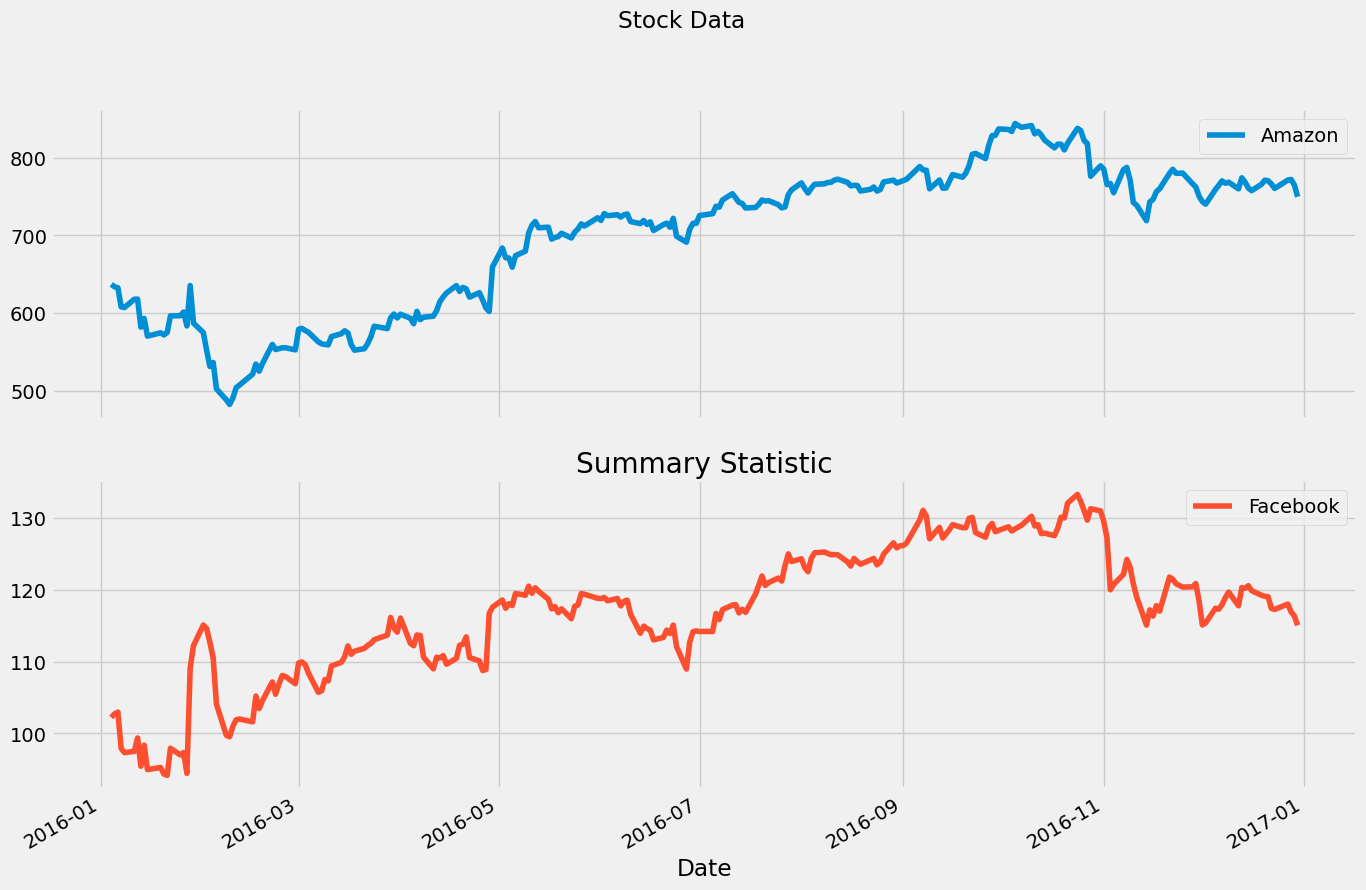

In [5]:
# visualize the stock_data
stock_data.plot(subplots=True, title='Stock Data', figsize=(15, 10))

# summarize the stock_data
summary_sd = stock_data.describe(
    percentiles=[.1, .5, .9],
    include=[np.number]
)
plt.title("Summary Statistic")
print(summary_sd)

## Visualize & summarize daily values for the S&P 500

           Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
10%    560.711981  104.633000
50%    727.875000  117.765000
90%    798.225976  128.648994
max    844.359985  133.279999


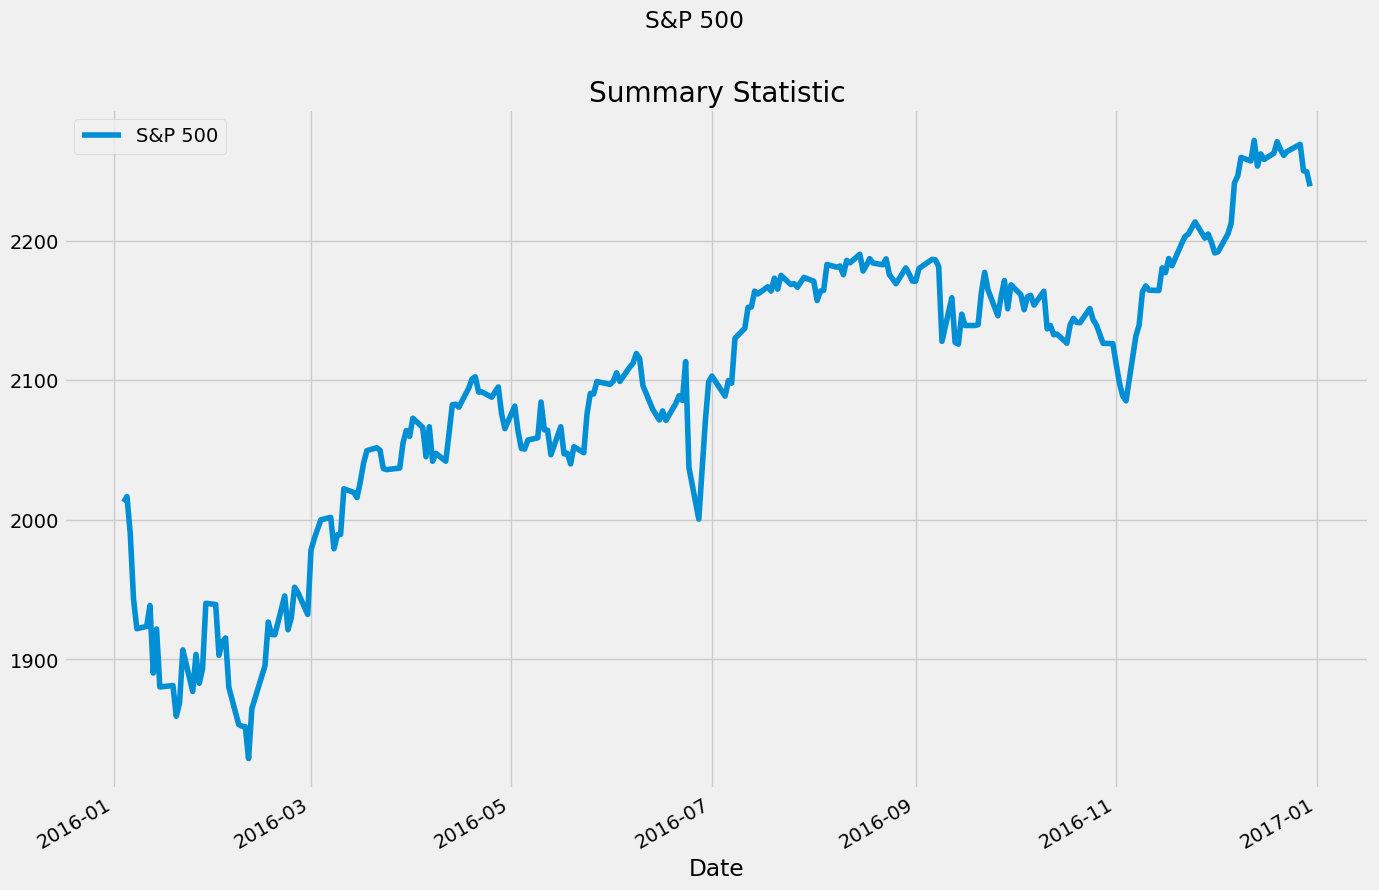

In [6]:
# plot the benchmark_data
benchmark_data.plot(subplots=True, title='S&P 500', figsize=(15, 10))

# summarize the benchmark_data
summary_bd = benchmark_data.describe(
    percentiles=[.1, .5, .9],
    include=[np.number]
)
plt.title("Summary Statistic")
print(summary_sd)

## The inputs for the Sharpe Ratio: Starting with Daily Stock Returns

           Amazon    Facebook
count  251.000000  251.000000
mean     0.000818    0.000626
std      0.018383    0.017840
min     -0.076100   -0.058105
25%     -0.007211   -0.007220
50%      0.000857    0.000879
75%      0.009224    0.008108
max      0.095664    0.155214


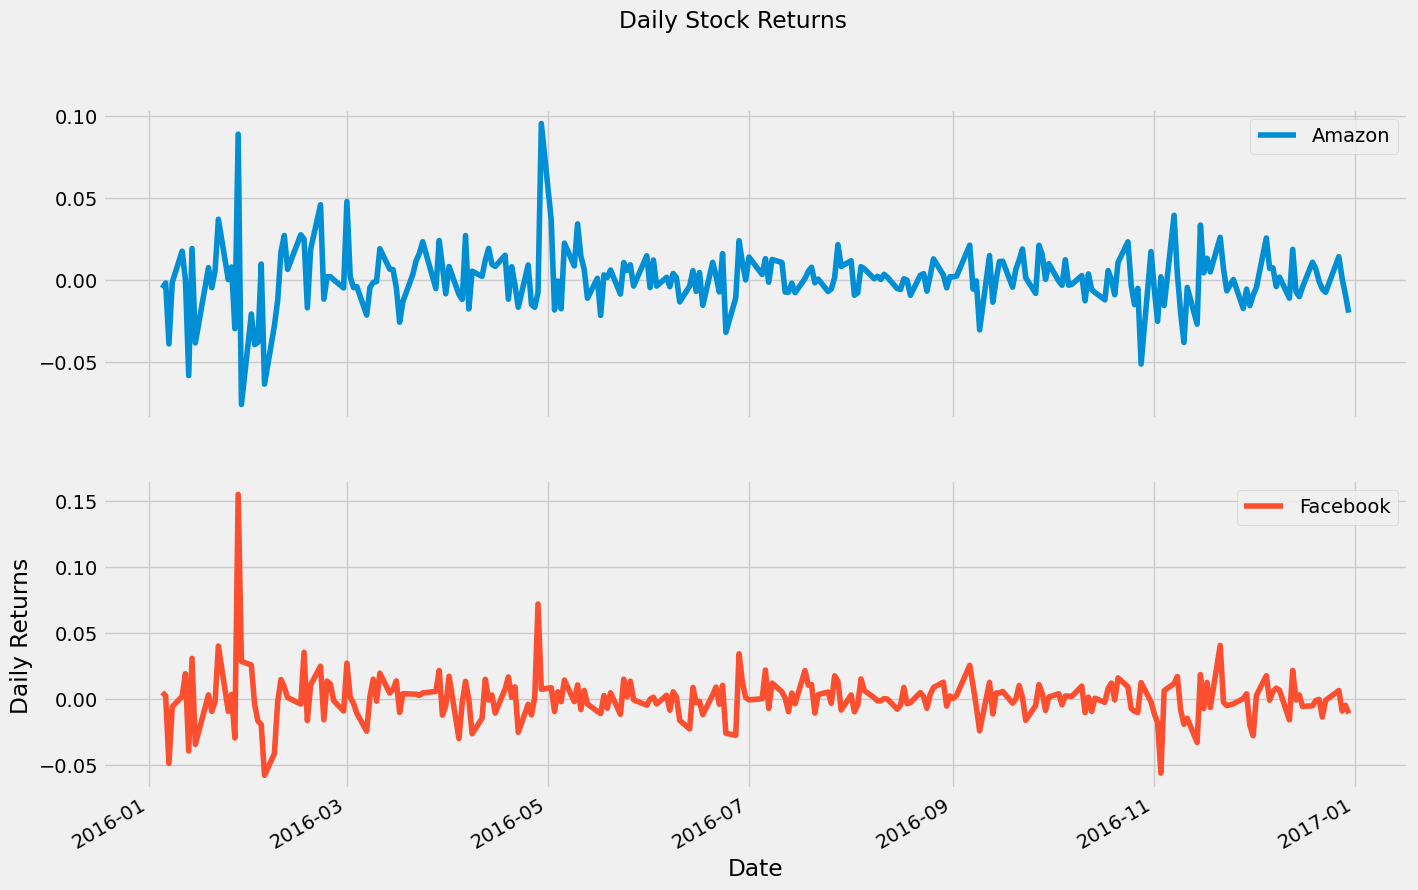

In [7]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot(
    subplots=True, 
    title='Daily Stock Returns',
    figsize=(15, 10)
)
plt.xlabel('Date')
plt.ylabel('Daily Returns')


# summarize the daily returns
summary_sd = stock_returns.describe()
print(summary_sd)

## Daily S&P 500 returns

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64


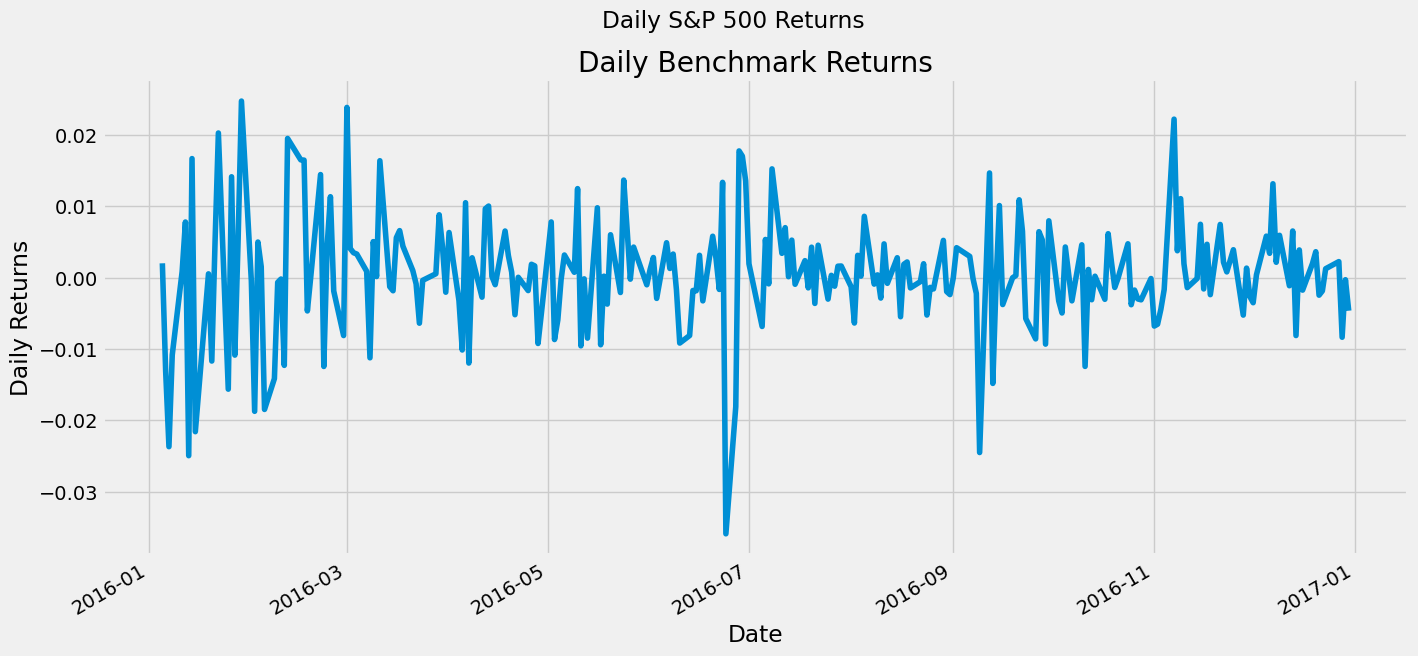

In [8]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(
    subplots=True,
    title='Daily S&P 500 Returns',
    figsize=(15, 7),
)
plt.title('Daily Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')


# summarize the daily returns
summary_bd = sp_returns.describe()
print(summary_bd)

## Calculate Excess Returns for Amazon and Facebook vs. S&P 500

           Amazon    Facebook
count  251.000000  251.000000
mean     0.000360    0.000168
std      0.016126    0.015439
min     -0.100860   -0.051958
25%     -0.006229   -0.005663
50%      0.000698   -0.000454
75%      0.007351    0.005814
max      0.100728    0.149686


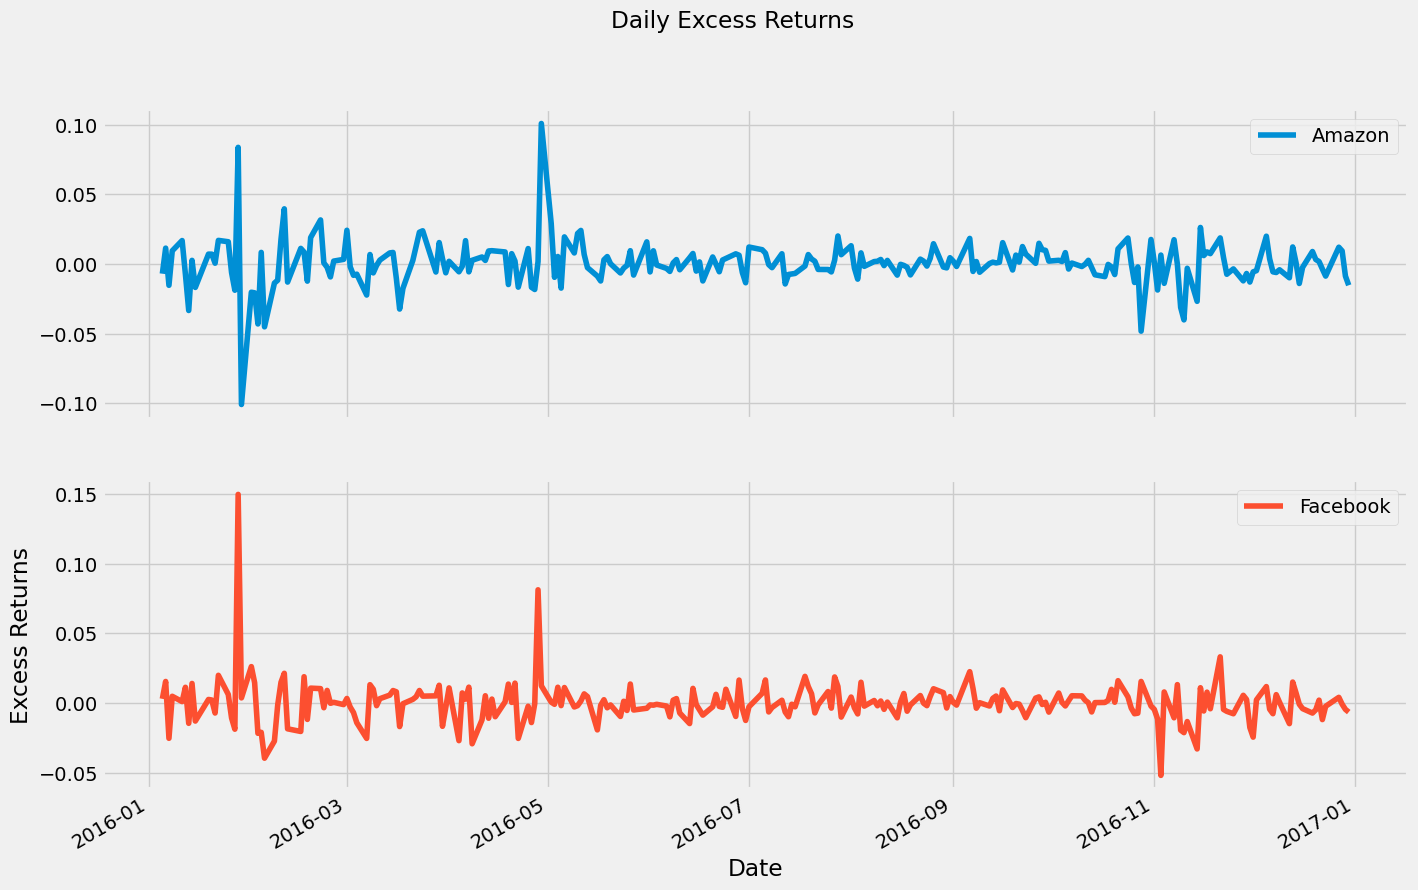

In [9]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot(
    subplots=True,
    title='Daily Excess Returns',
    figsize=(15, 10)
)
plt.xlabel('Date')
plt.ylabel('Excess Returns')


# summarize the excess_returns
sumamry_er = excess_returns.describe()
print(sumamry_er)

## The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500

Text(0, 0.5, 'Mean Excess Return')

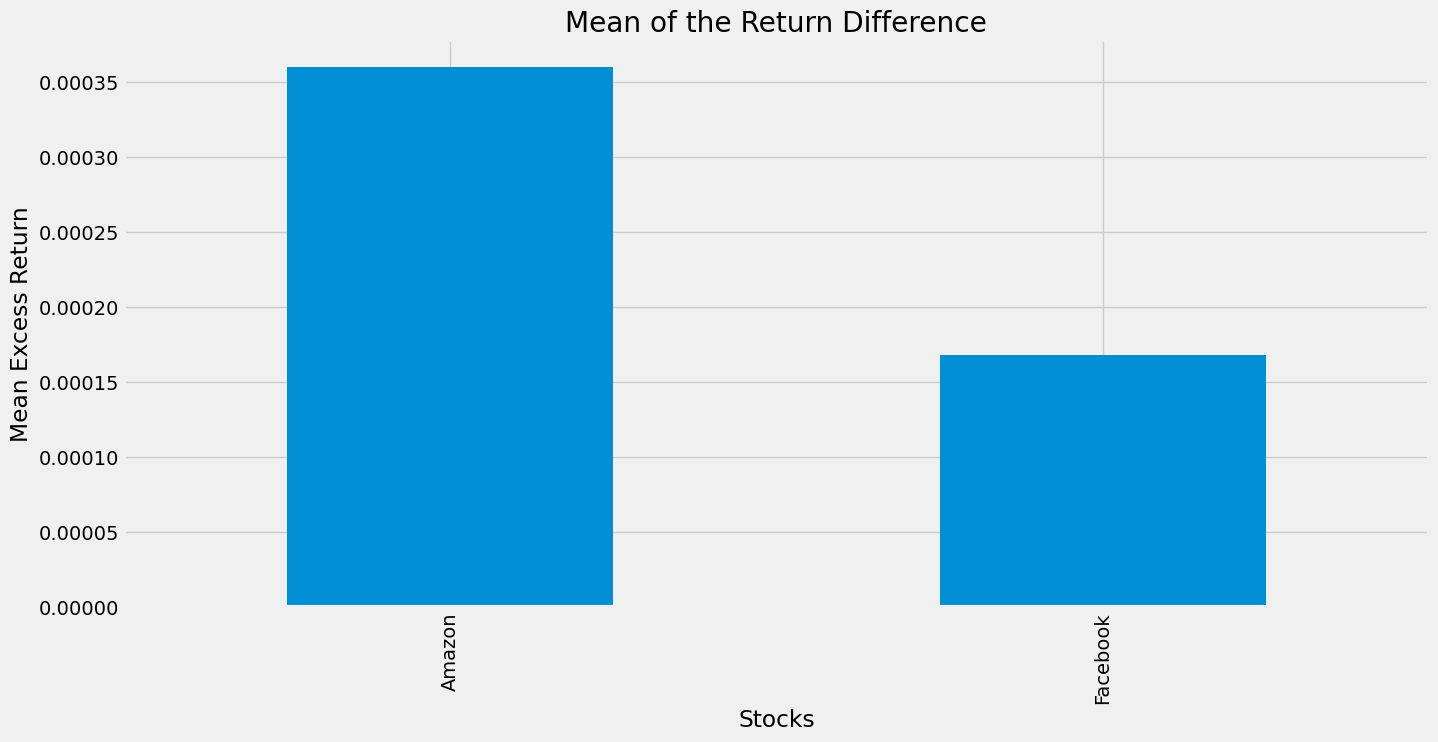

In [10]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(
    title='Mean of the Return Difference',
    figsize=(15, 7)
)
plt.xlabel('Stocks')
plt.ylabel('Mean Excess Return')

## The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference

Text(0, 0.5, 'Standard Deviation of Excess Return')

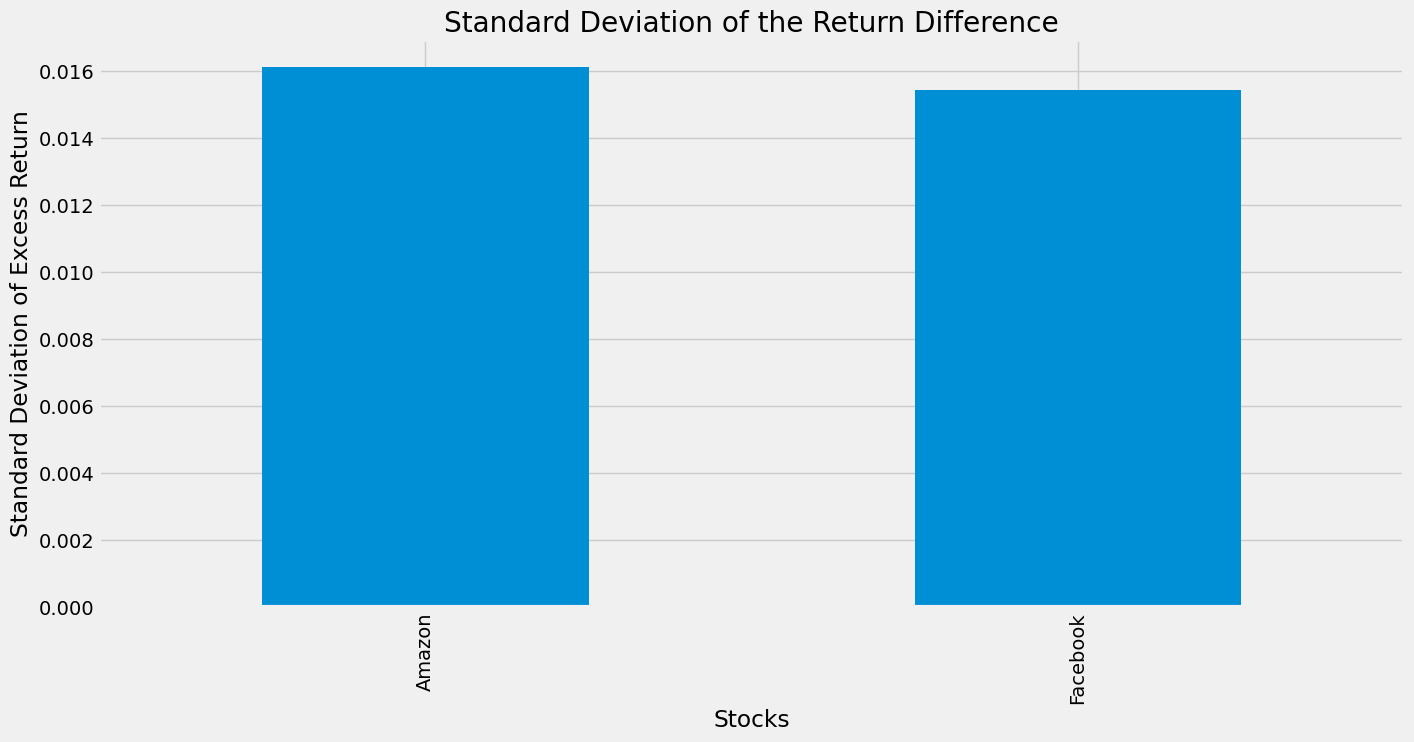

In [11]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot(
    kind='bar',
    title='Standard Deviation of the Return Difference',
    figsize=(15, 7)
)
plt.xlabel('Stocks')
plt.ylabel('Standard Deviation of Excess Return')

## Putting it all together

Text(0, 0.5, 'Annualized Sharpe Ratio')

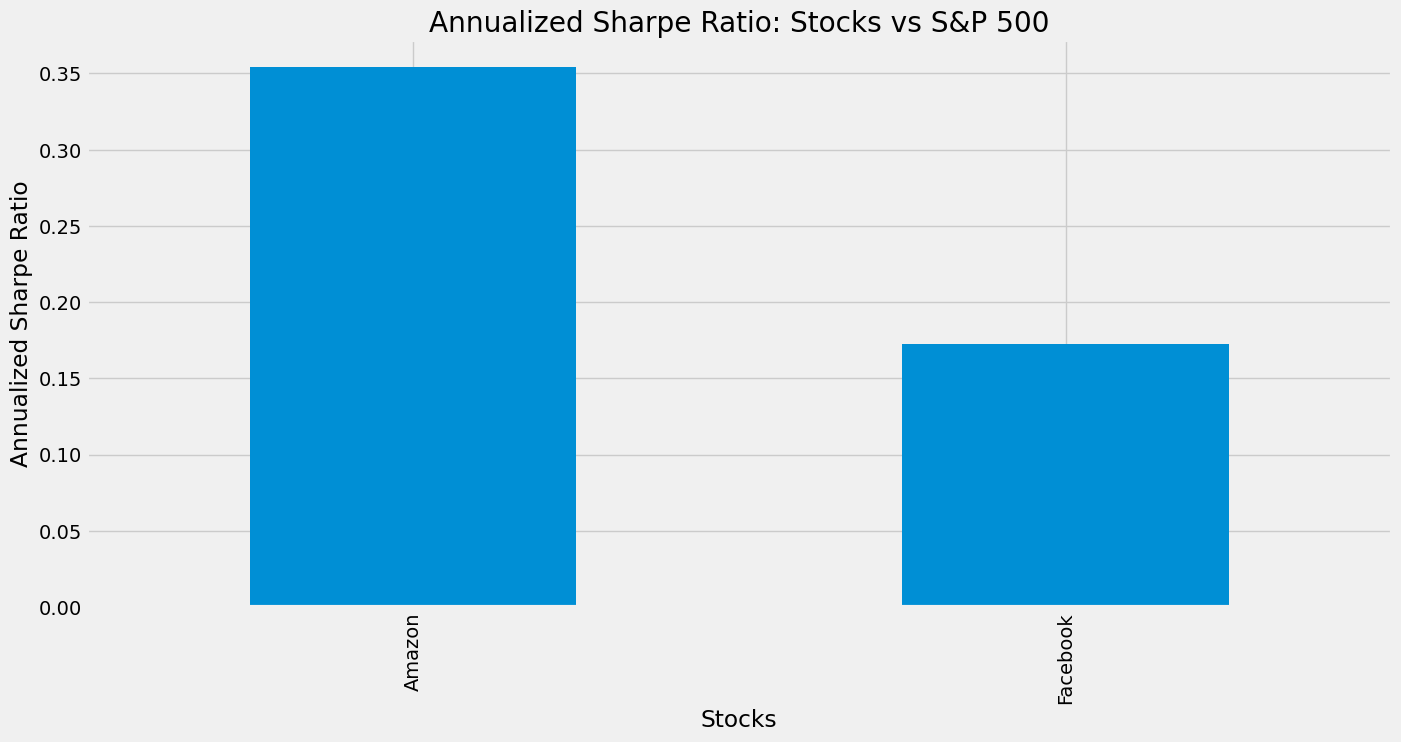

In [12]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return, axis=0)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor, axis=0) 

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot(
    kind='bar', 
    title='Annualized Sharpe Ratio: Stocks vs S&P 500',
    figsize=(15, 7)
)
plt.xlabel('Stocks')
plt.ylabel('Annualized Sharpe Ratio')